## ARIMA -  shampoo dataset

In [1]:
# Import Packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6


In [2]:
#import data

data = pd.read_csv('shampoo-sales.csv')

In [4]:
data.head()

,Month,Sales of shampoo over a three year period
0,1/1/2019,266.0
1,2/1/2019,145.9
2,3/1/2019,183.1
3,4/1/2019,119.3
4,5/1/2019,180.3


In [5]:
#Convert the Month to datetime format
ts = pd.read_csv('shampoo-sales.csv',header=0, parse_dates=[0], index_col=0, squeeze=True)

In [6]:
ts.head()

Month
2019-01-01    266.0
2019-02-01    145.9
2019-03-01    183.1
2019-04-01    119.3
2019-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [7]:
ts.dtypes

dtype('float64')

In [8]:
ts.tail()

Month
2019-08-03    407.6
2019-09-03    682.0
2019-10-03    475.3
2019-11-03    581.3
2019-12-03    646.9
Name: Sales of shampoo over a three year period, dtype: float64

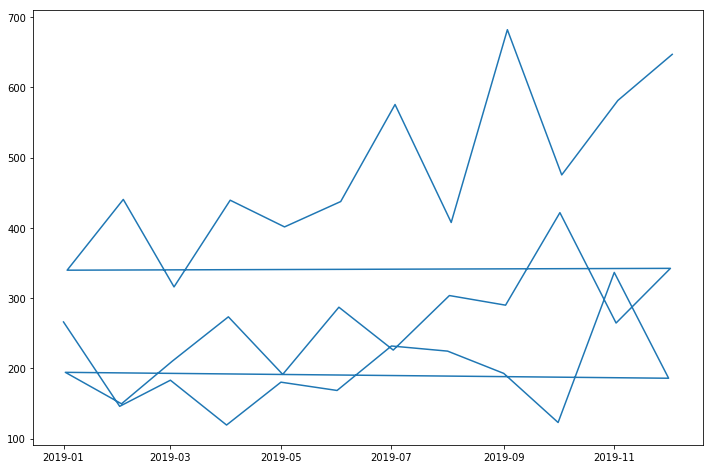

In [9]:
#plot timeseries
plt.figure(figsize=(12,8))
plt.plot(ts)

### Autocorrelation

Autocorrelation :- The process of finding the correlation between the an observation of the time series and its previous times of the same series ( Lags). And its strenght can determined by ACF plot

In [ ]:
# ACF Plot

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts, lags = 20)
#plt.xlim(0, 50)
plt.show()

### Partial Autocorrelation

Partial Autocorrelation is same as autocorrelation but without intervening observations.
The Autocorrelation has both direct correlation and indirect correlations between the observation and its pervious observation.
But in Partial Autocorrelation it has only direct correlation while finding the relation b/w observation and its pervious observation.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(ts, lags=20)
plt.show()

### Autoregression (AR) process with a lag of k

As ACF has both direct and indirect correlations , the ACF for the AR(k) time series  will be strong to a lag of k and gradually decrease.

And as PACF has only direct correlations , the PACF for the AR(k) time series  will be strong to a lag of k and no correlation beyond.

So AR values can be easily found by PACF Plot.

### Moving average (MA) process with a lag of k.

Moving average model constitute only residual errors by which it corrects future forecasts based on errors made on recent forecasts.

ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation

PACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then the values gradually decrease.

So MA values can be easily found by ACF Plot.


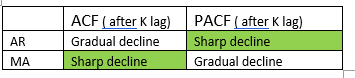


### Autoregression (AR)
1. The autoregression (AR) method models the next step based on the observations in previous step by Linear Regression.
2. AR(p). For example, AR(1) is a first-order autoregression model.
3. The method is suitable for univariate time series without trend and seasonal components

In [ ]:
from statsmodels.tsa.ar_model import AR

ar_model = AR(ts)
ar_fit = ar_model.fit()
pred = ar_fit.predict(len(ts), len(ts))
print(pred)

In [ ]:
# Program to test the stationarity

from statsmodels.tsa.stattools import adfuller

def test_stationarity(ts):
    
    roll_mean = ts.rolling(12).mean()
    roll_std = ts.rolling(12).std()
    
    #plot rolling statistics
    orig = plt.plot(ts, color = 'blue', label = 'Original')
    mean = plt.plot(roll_mean, color = 'red', label = 'roll_mean')
    std = plt.plot(roll_std, color = 'black', label = 'roll_std')
    plt.title('Rolling Statistics')
    plt.legend(loc='best')
    plt.show(block=False)
    
    print('Statistical Test')
    dftest = adfuller(ts, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistics', 'p-Value', '#Lag', 'Number of observations'])
    for key,value in dftest[4].items():
        df_output['Critical Value(%s)'%key] = value
    print(df_output)

In [ ]:
plt.figure(figsize=(12,8))
test_stationarity(ts)

Both Rolling mean & std plot and statistics shows the data is not stationary ( Test Statistics > Critical value - not stationary)

Here as the Non- Stationarity is only due to trend we can directly use the ARIMA , where it takes non- stationarity data and develop the time series forecast model

### Moving Average (MA)
1. The Moving Average (MA) method models the next step based on the residual errors previous step by Linear Regression.
2. MA(q). For example, MA(1) is a first-order moving average model.
3. The method is suitable for univariate time series without trend and seasonal components

In [ ]:
from statsmodels.tsa.arima_model import ARMA

ma_model = ARMA(ts, order=(0,1))
ma_fit = ma_model.fit(disp=False)
ma_pred = ma_fit.predict(len(ts), len(ts))
print(ma_pred)

### Autoregressive Moving Average (ARMA)

It combines both AR & MA model

In [ ]:
from statsmodels.tsa.arima_model import ARMA

arma_model = ARMA(ts, order=(1,1))
arma_fit = arma_model.fit()
arma_pred = arma_fit.predict(len(ts), len(ts))
print(arma_pred)

### Autoregressive Integrated Moving Average (ARIMA)

In this model in addition to AR , MA model it also has I i.e integration of differenciation which helps in converting the non- stationary ( trend & seasionality ) to stationary.

The method is suitable for univariate time series with trend and without seasonal components

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and its residual error fand applied to lagged observations.

The parameters of the ARIMA model are defined as follows:

p (Lag Order): The number of lag observations included in the model, also called the lag order.This would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

d (Differencing degree): The number of times that the raw observations are differenced, also called the degree of differencing.
This would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

q (MA order): The size of the moving average window, also called the order of moving average. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.
\

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(ts, order=(1,0,1))
# in this we consider d as 0 as the data is already sationary
arima_fit = arima_model.fit()
arima_pred = arima_fit.predict(len(ts), len(ts))
print(arima_pred)

### ARIMA - Grid search of p,d,q parameters - shampoo dataset

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.plot(ts['1901'])
plt.subplot(1,3,2)
plt.plot(ts['1902'])
plt.subplot(1,3,3)
plt.plot(ts['1903'])

From the above graph it is evident that there is no seasonality but we can observe the trend

In [ ]:
#To find the optimal values to the p,d,q parameters
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
    train_size = int(len(X)*0.66)
    train, test = X[:train_size], X[train_size:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA( history, order = arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(train[t])
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(dataset, p_values, d_values,q_values ):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE = %.3f' %(order, mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' %(best_cfg, best_score))
                    


In [ ]:
p_values = range(0,8)
d_values = range(0,3)
q_values = range(0,3)

evaluate_models(ts, p_values, d_values, q_values )

From the above ARIMA parameter grid search method we identified that Best ARIMA(6, 1, 1) with least MSE=62491.594

In [ ]:
from sklearn.metrics import mean_squared_error

X = ts
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()